In [46]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import json
from os.path import join

In [63]:
dataset_name = 'proteins'
level_reduction = '50'
seed = '1344'
folder = f'../results/{dataset_name}/analysis_refused'
filename = join(folder,
                level_reduction,
                seed,
                'graph_stats.json')

with open(filename, 'r') as file:
    graph_stats = json.load(file)

In [64]:
# Set matplotlib's style
plt.style.use('seaborn')

In [65]:
linewidth = 0.5,

In [66]:
def plot_bar(values, title, xlabel='--'):
    counts = np.bincount(values)

    fig, ax = plt.subplots()

    if np.max(values) > 50:
        ax.hist(values,
                bins=range(max(values)))
    else:
        ax.bar(range(counts.size),
               counts,
               width=0.3,
               align='center',
               linewidth=0.9,
               edgecolor="white")
        ax.set(
            xticks=range(counts.size),
            xlim=[0, counts.size],
        )

    ax.set(
        title=title,
        xlabel=xlabel,
        ylabel='# graphs'
    )
    # ax.autoscale(tight=True)

    plt.show()


def print_statistics(values, name):
    print('-' * 20)
    print(f'Mean {name}: {np.mean(values):.2f}±{np.std(values):.2f}')
    print(f'Median {name}: {np.median(values):.2f}')
    print(f'Min-Max {name}: {np.min(values)}-{np.max(values)}')

In [67]:
print('-- statistics --')
print_statistics(graph_stats['n_connected_components'],
                 'num connected components')
print_statistics(graph_stats['n_isolated_nodes'],
                 'num isolated nodes')
print_statistics(graph_stats['n_nodes'],
                 'num nodes')
print_statistics(graph_stats['n_edges'],
                 'num edges')
print_statistics(graph_stats['mean_degrees'],
                 'mean degree')
print_statistics(graph_stats['max_degrees'],
                 'max degrees')


-- statistics --
--------------------
Mean num connected components: 2.07±1.58
Median num connected components: 2.00
Min-Max num connected components: 1-21
--------------------
Mean num isolated nodes: 0.17±0.65
Median num isolated nodes: 0.00
Min-Max num isolated nodes: 0-10
--------------------
Mean num nodes: 19.55±20.51
Median num nodes: 14.00
Min-Max num nodes: 2-241
--------------------
Mean num edges: 54.23±69.94
Median num edges: 30.00
Min-Max num edges: 1-591
--------------------
Mean mean degree: 4.64±1.71
Median mean degree: 4.50
Min-Max mean degree: 1.0-10.413793103448276
--------------------
Mean max degrees: 7.14±3.49
Median max degrees: 7.00
Min-Max max degrees: 1-22


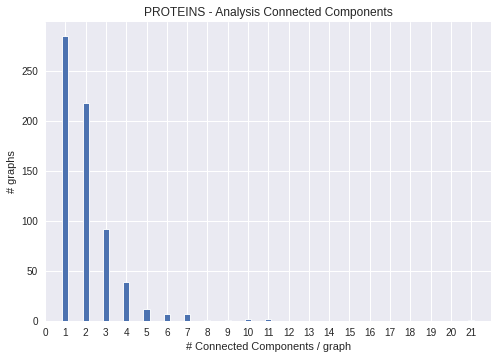

In [68]:
## Connected Components
plot_bar(graph_stats['n_connected_components'],
         title=f'{dataset_name.upper()} - Analysis Connected Components',
         xlabel='# Connected Components / graph')

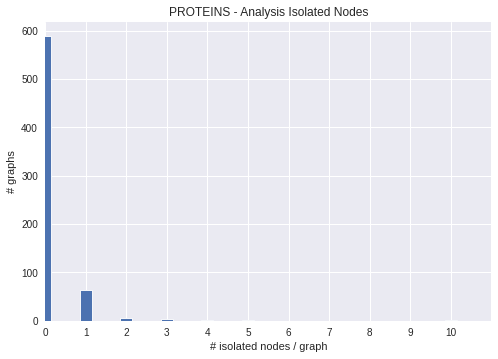

In [69]:
# Isolated nodes
plot_bar(graph_stats['n_isolated_nodes'],
         title=f'{dataset_name.upper()} - Analysis Isolated Nodes',
         xlabel='# isolated nodes / graph')

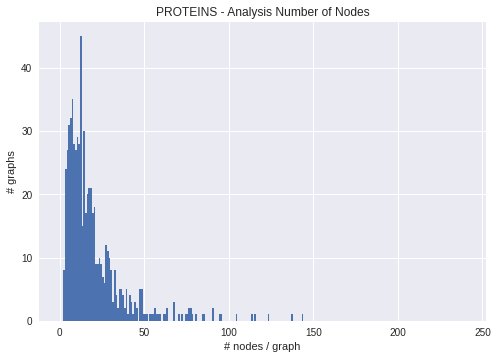

In [70]:
plot_bar(graph_stats['n_nodes'],
         title=f'{dataset_name.upper()} - Analysis Number of Nodes',
         xlabel='# nodes / graph')

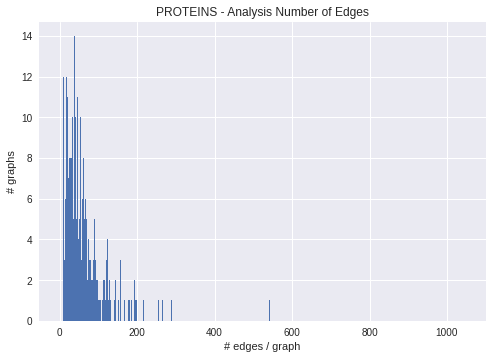

In [56]:
plot_bar(graph_stats['n_edges'],
         title=f'{dataset_name.upper()} - Analysis Number of Edges',
         xlabel='# edges / graph')

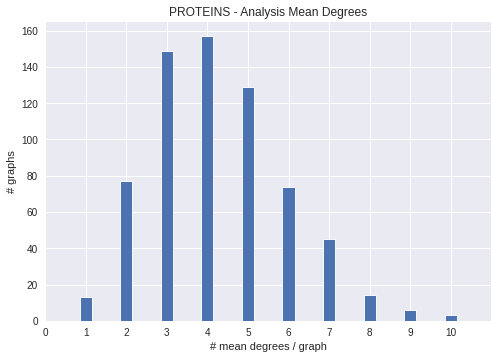

In [71]:
plot_bar(graph_stats['mean_degrees'],
         title=f'{dataset_name.upper()} - Analysis Mean Degrees',
         xlabel='# mean degrees / graph')

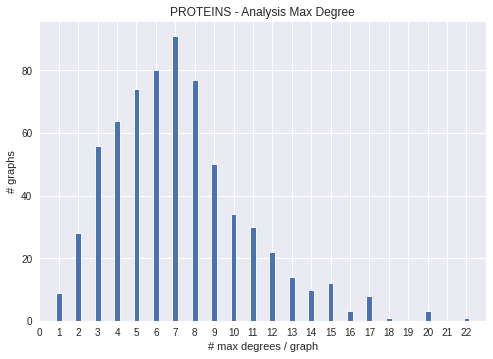

In [72]:

plot_bar(graph_stats['max_degrees'],
         title=f'{dataset_name.upper()} - Analysis Max Degree',
         xlabel='# max degrees / graph')